<a href="https://colab.research.google.com/github/Zetty0827/auto-annotated-portfolio/blob/main/Crypto_VS_NASDAQ_VS_S%26P_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


Missing values per column (quarterly prices):
Ticker
QQQ         0
SPY         0
BTC-USD    42
dtype: int64

Sample data (first 5 rows):
Ticker            QQQ        SPY  BTC-USD
Date                                     
2009-09-30  36.746223  79.248589      NaN
2009-12-31  39.856701  84.089470      NaN
2010-03-31  42.001041  88.648483      NaN
2010-06-30  37.391991  78.579758      NaN
2010-09-30  43.060688  87.350510      NaN

Sample data (last 5 rows):
Ticker             QQQ         SPY        BTC-USD
Date                                             
2024-09-30  486.012848  568.439880   63329.500000
2024-12-31  509.896118  582.599915   93429.203125
2025-03-31  468.393982  557.741150   82548.914062
2025-06-30  551.640015  617.849976  107135.335938
2025-09-30  561.426270  631.885010  117795.250000


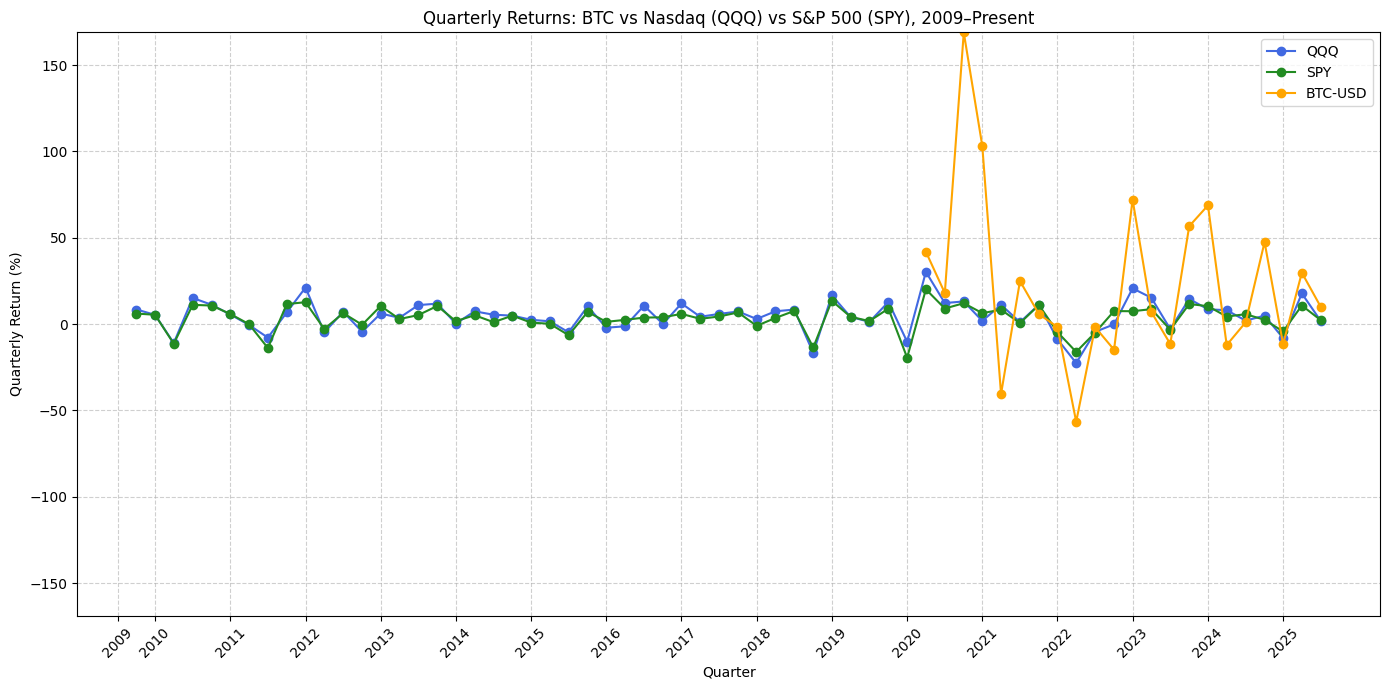


Sortino Ratios (higher is better):
 Ticker
QQQ        0.523992
SPY        0.362259
BTC-USD    0.876846
dtype: float64
Sharpe Ratios (higher is better):
 Ticker
QQQ        0.520601
SPY        0.481536
BTC-USD    0.460200
dtype: float64

Compound Annual Growth Rate (CAGR, %):
 QQQ        18.267785
SPY        13.628151
BTC-USD    65.781563
dtype: float64

Maximum Drawdown (MDD, %):
 Ticker
QQQ       -32.576997
SPY       -23.927177
BTC-USD   -71.914759
dtype: float64


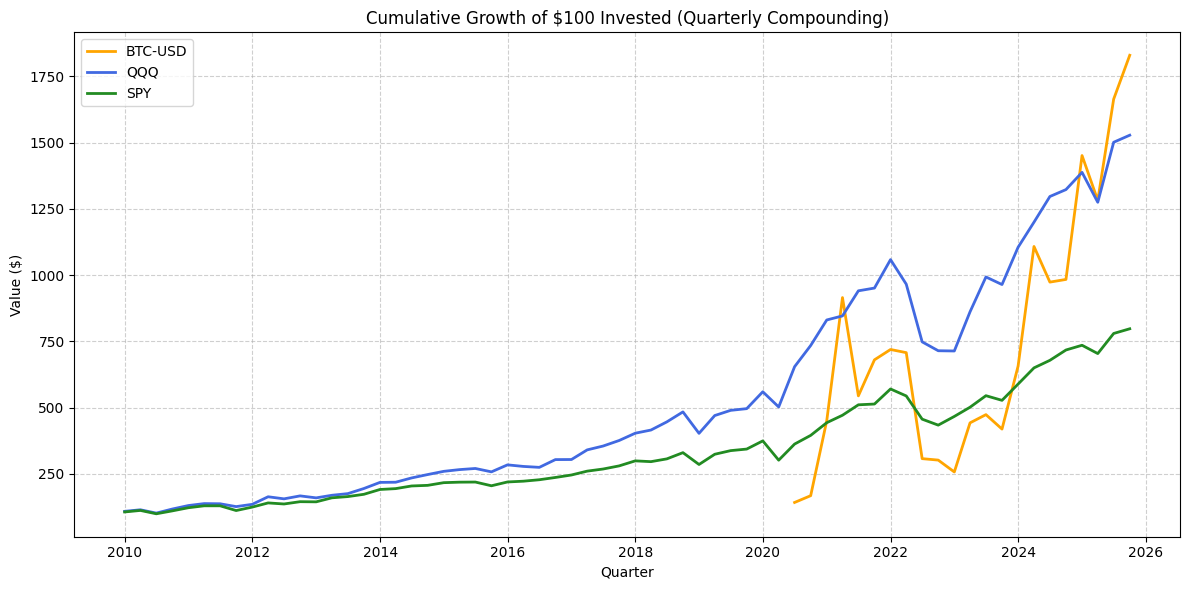


T-test BTC vs QQQ (p-value): 0.12372636235423941
T-test BTC vs SPY (p-value): 0.0994256206912543

ANOVA p-value: 0.08545449007925456

Correlation Matrix:
 Ticker        QQQ       SPY   BTC-USD
Ticker                               
QQQ      1.000000  0.924921  0.474467
SPY      0.924921  1.000000  0.522165
BTC-USD  0.474467  0.522165  1.000000

Mann-Whitney U test BTC vs QQQ: statistic = 271.0 , p-value = 0.5035147104262714
Mann-Whitney U test BTC vs SPY: statistic = 275.0 , p-value = 0.4455466812579779


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/tmp/ipython-input-25-239676622.py:168: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=last_quarter + QuarterEnd(), periods=n_quarters, freq='Q')
/tmp/ipython-input-25-239676622.py:168: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=last_quarter + QuarterEnd(), periods=n_quarters, freq='Q')
/tmp/ipython-input-25-239676622.py:168: FutureW

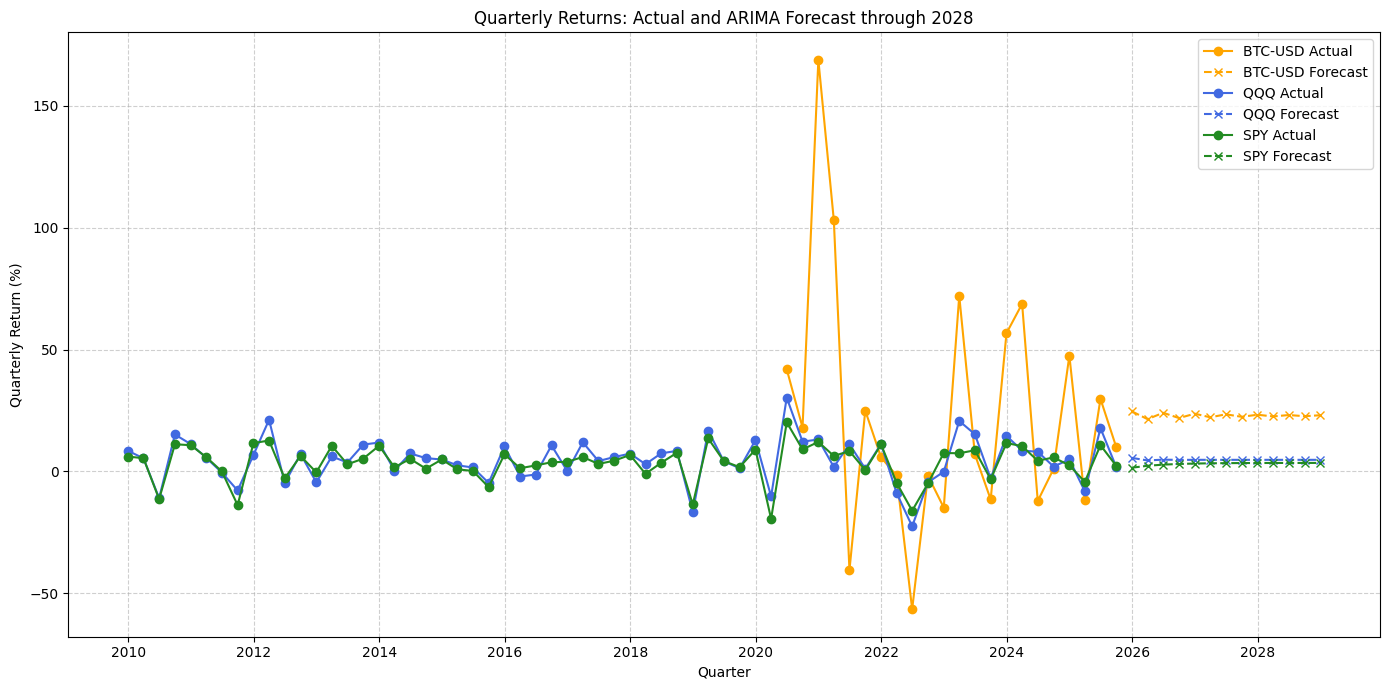


GARCH(1,1) summary for BTC-USD:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                BTC-USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -114.516
Distribution:                  Normal   AIC:                           237.032
Method:            Maximum Likelihood   BIC:                           241.397
                                        No. Observations:                   22
Date:                Wed, Jul 23 2025   Df Residuals:                       21
Time:                        16:46:01   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.6249      8.698    

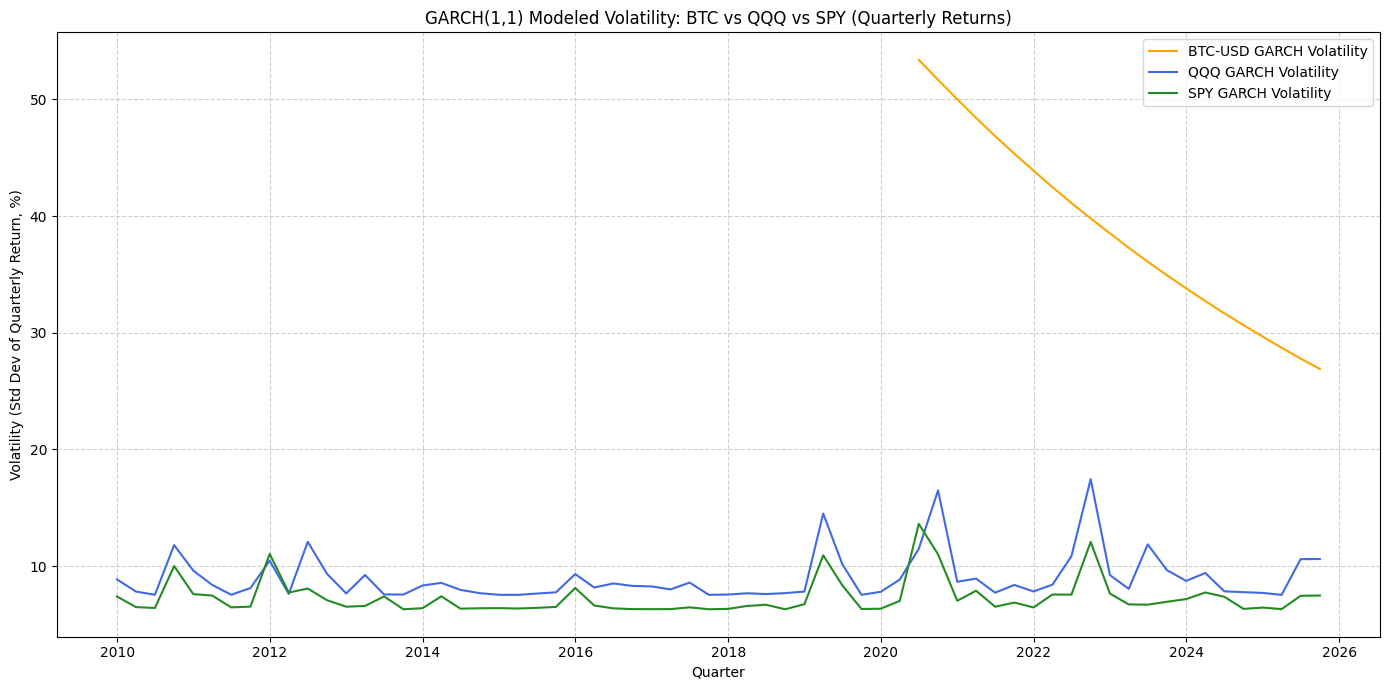

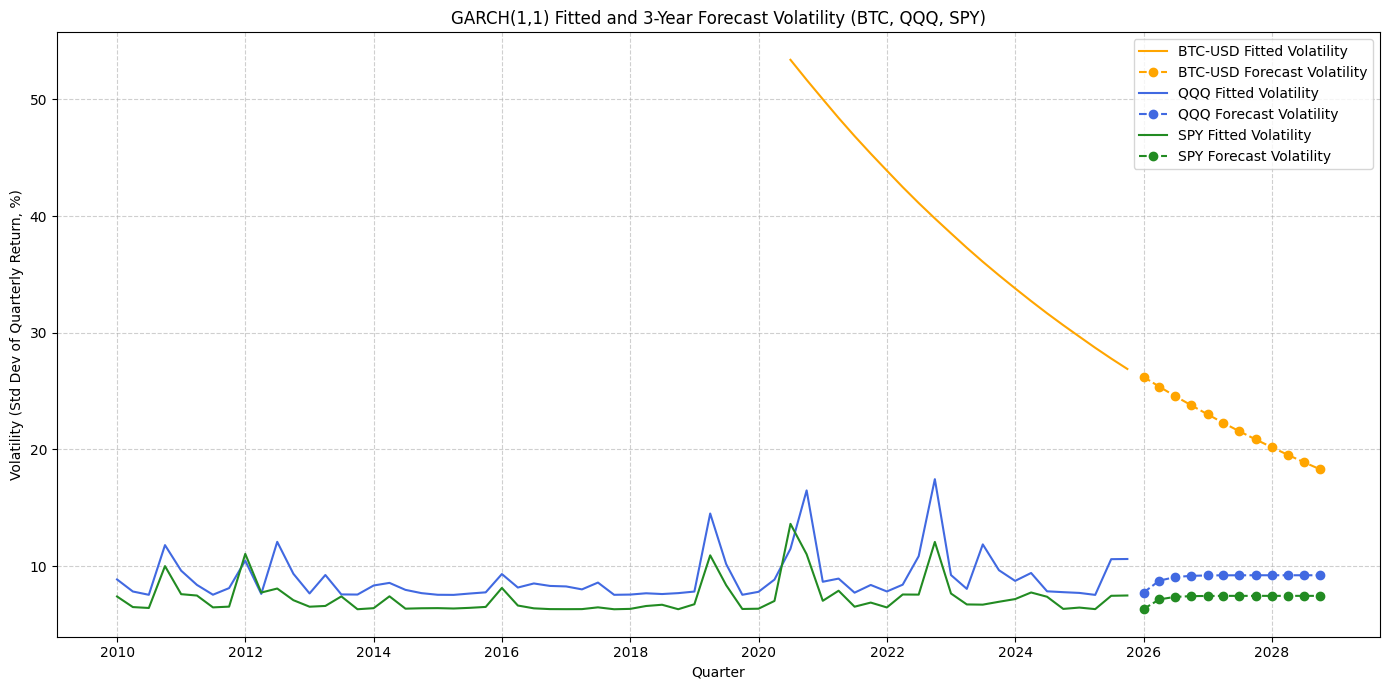

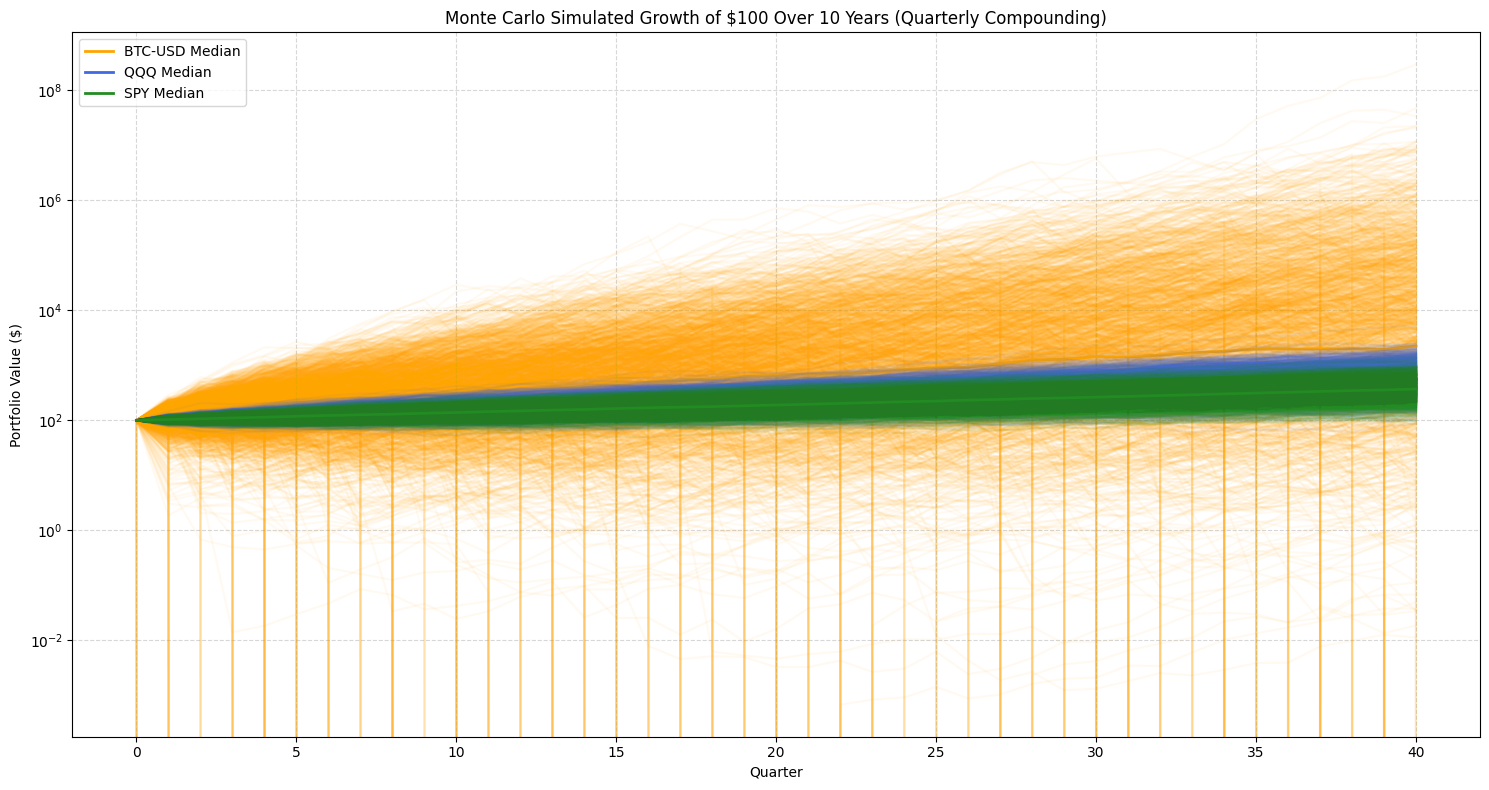

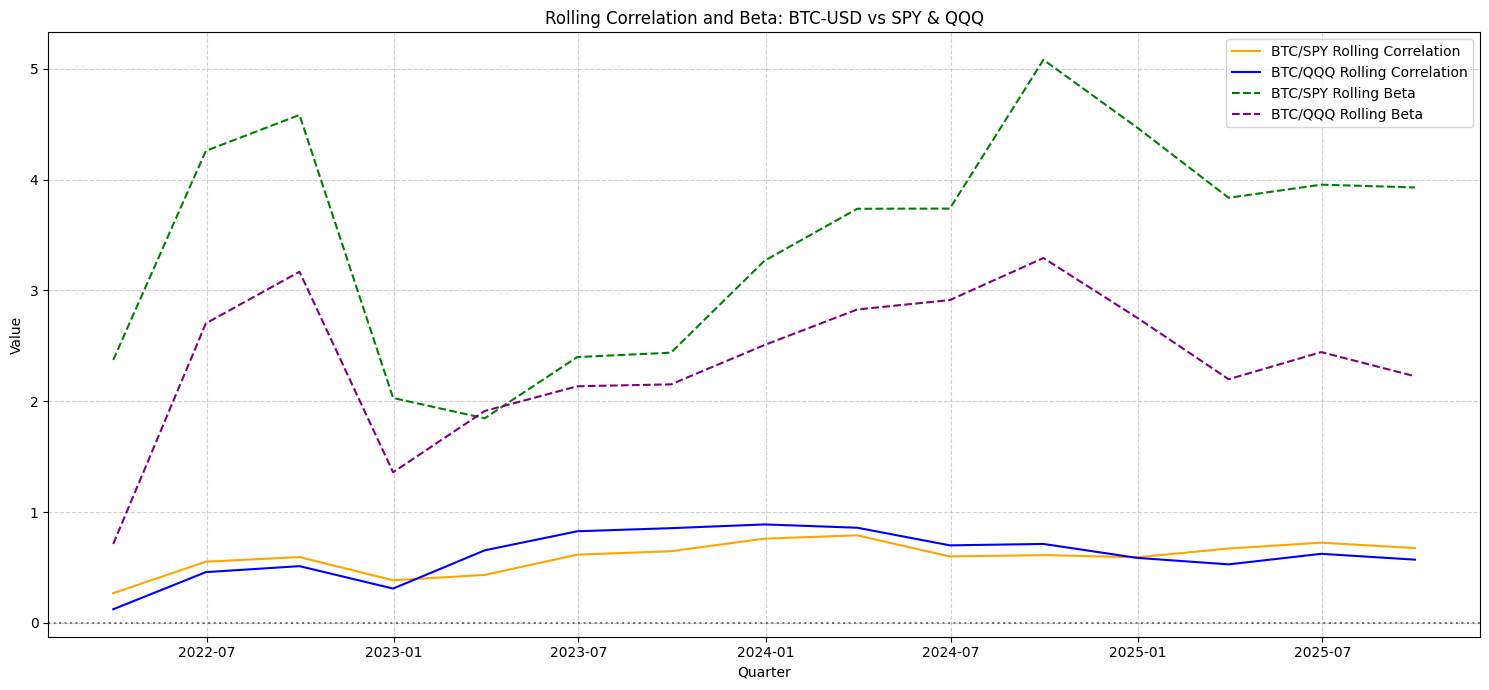

Quarterly 5% VaR and CVaR (Expected Shortfall):
BTC-USD:
  5% VaR  = -39.24%  (5% chance of losing at least this much or more in a quarter)
  CVaR    = -48.54%  (average loss in worst 5% of quarters)

QQQ:
  5% VaR  = -10.03%  (5% chance of losing at least this much or more in a quarter)
  CVaR    = -15.13%  (average loss in worst 5% of quarters)

SPY:
  5% VaR  = -13.21%  (5% chance of losing at least this much or more in a quarter)
  CVaR    = -15.73%  (average loss in worst 5% of quarters)


BTC-USD Factor Regression Results:
                             OLS Regression Results                            
Dep. Variable:                BTC-USD   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2.809
Date:                Wed, 23 Jul 2025   Prob (F-statistic):             0.0690
Time:                        16:46:32   Log-Likelihood:              

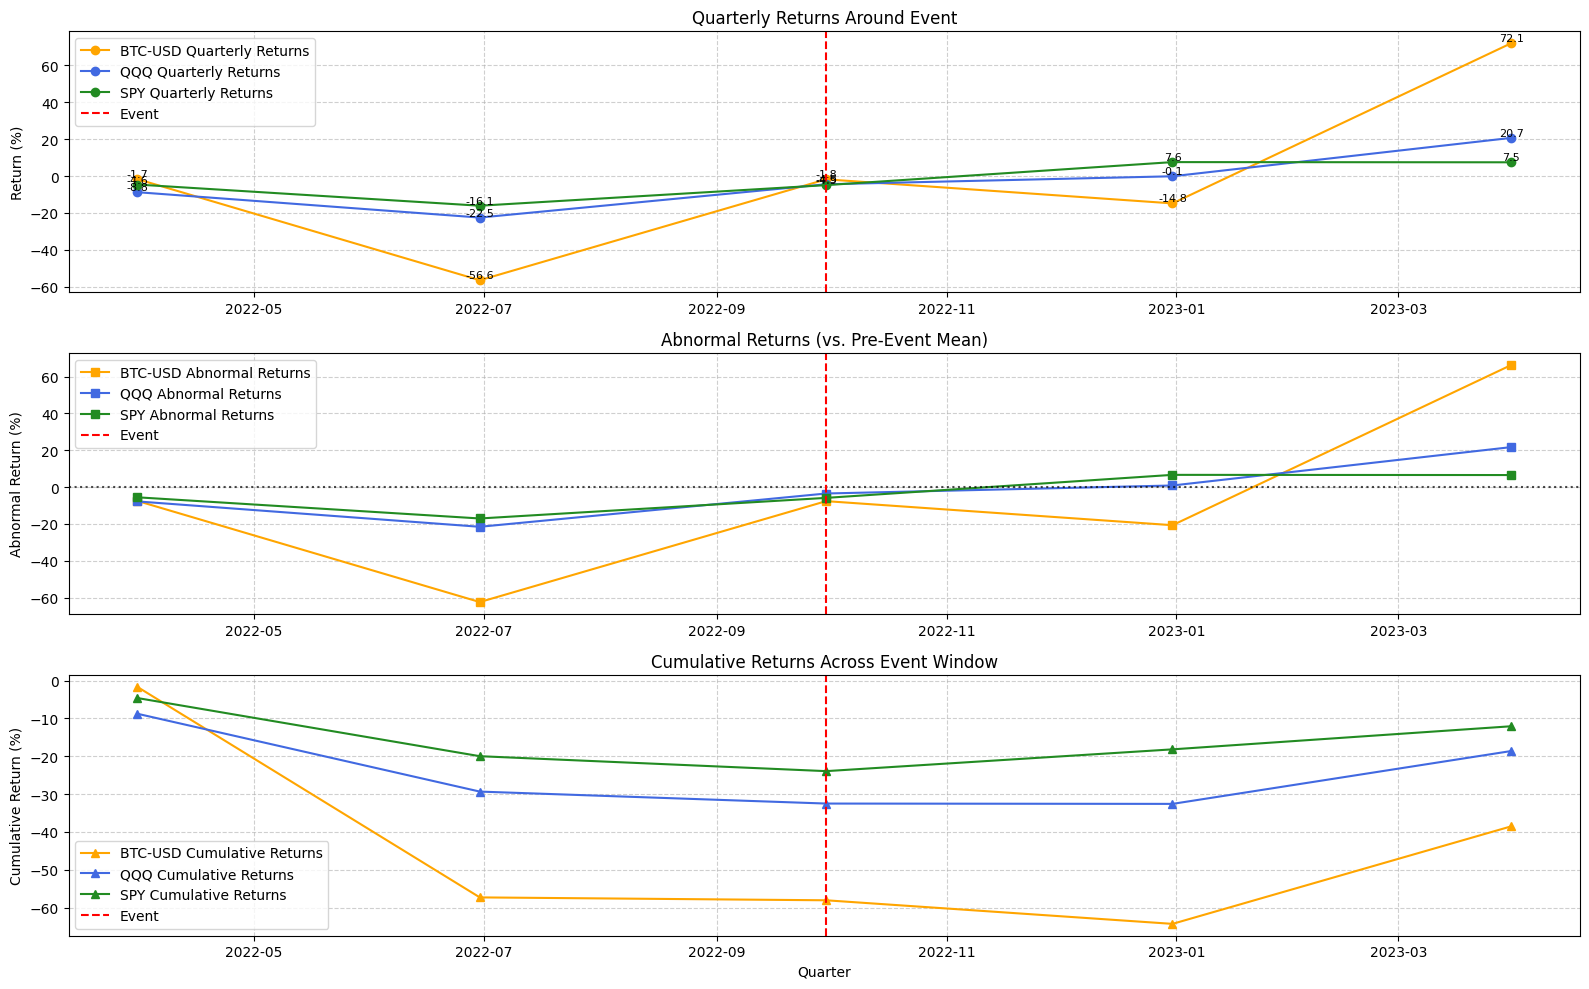

Event Study Statistical Test Results (t-test for abnormal returns):

BTC-USD:
  Mean pre-event return: 5.86%
  Mean event window return: -0.55%
  t-stat: -0.31, p-value: 0.7732
  >> No statistically significant change from normal returns.

QQQ:
  Mean pre-event return: -0.98%
  Mean event window return: -3.04%
  t-stat: -0.29, p-value: 0.7840
  >> No statistically significant change from normal returns.

SPY:
  Mean pre-event return: 0.94%
  Mean event window return: -2.13%
  t-stat: -0.69, p-value: 0.5285
  >> No statistically significant change from normal returns.



In [25]:
# =========================
# 1. INSTALL & IMPORTS
# =========================
!pip install yfinance --quiet
!pip install arch --quiet
!pip install pandas_datareader --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import statsmodels.api as sm
from pandas.tseries.offsets import QuarterEnd
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, ttest_1samp
import pandas_datareader.data as web

# =========================
# 2. DOWNLOAD & PREP DATA
# =========================
# Download QQQ & SPY (from 2009), BTC-USD (from 2020)
stocks_symbols = ['QQQ', 'SPY']
stocks_data = yf.download(stocks_symbols, start='2009-07-01', auto_adjust=False)['Adj Close']
btc_data = yf.download('BTC-USD', start='2020-01-01', auto_adjust=False)['Adj Close']
btc_data = btc_data.to_frame(name='BTC-USD') if isinstance(btc_data, pd.Series) else btc_data.rename(columns={'Adj Close': 'BTC-USD'})

# Resample to end-of-quarter
stocks_quarterly = stocks_data.resample('QE').last()
btc_quarterly = btc_data.resample('QE').last()
combined = stocks_quarterly.join(btc_quarterly, how='outer')

# =========================
# 3. CALCULATE RETURNS
# =========================
quarterly_returns = combined.pct_change() * 100

# =========================
# 4. MISSING DATA CHECK
# =========================
print("Missing values per column (quarterly prices):")
print(combined.isnull().sum())
print("\nSample data (first 5 rows):")
print(combined.head())
print("\nSample data (last 5 rows):")
print(combined.tail())

# =========================
# 5. QUARTERLY RETURNS PLOT
# =========================
years = np.arange(quarterly_returns.index.year.min(), quarterly_returns.index.year.max() + 1)
year_locs = [quarterly_returns.index[quarterly_returns.index.year == y][0]
             for y in years if any(quarterly_returns.index.year == y)]
ymax = np.ceil(np.nanmax(np.abs(quarterly_returns.values)))
ymax = ymax if not (np.isnan(ymax) or ymax == 0) else 1

plt.figure(figsize=(14,7))
plt.plot(quarterly_returns.index, quarterly_returns['QQQ'], label='QQQ', marker='o', color='royalblue')
plt.plot(quarterly_returns.index, quarterly_returns['SPY'], label='SPY', marker='o', color='forestgreen')
plt.plot(quarterly_returns.index, quarterly_returns['BTC-USD'], label='BTC-USD', marker='o', color='orange')
plt.title("Quarterly Returns: BTC vs Nasdaq (QQQ) vs S&P 500 (SPY), 2009–Present")
plt.ylabel("Quarterly Return (%)")
plt.xlabel("Quarter")
plt.xticks(ticks=year_locs, labels=[str(y) for y in years if any(quarterly_returns.index.year == y)], rotation=45)
plt.ylim(-ymax, ymax)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig('quarterly_returns_plot.png', dpi=300)
plt.show()

# =========================
# 6. RISK/REWARD METRICS
# =========================
def sortino_ratio(returns, rf=0):
    downside_returns = returns[returns < rf]
    downside_std = np.sqrt((downside_returns**2).mean())
    return (returns.mean() - rf) / downside_std if downside_std != 0 else np.nan

def sharpe_ratio(returns, rf=0):
    return (returns.mean() - rf) / returns.std() if returns.std() != 0 else np.nan

def CAGR(prices):
    periods = len(prices) / 4  # Quarterly data
    return ((prices.iloc[-1] / prices.iloc[0]) ** (1 / periods)) - 1

def max_drawdown(returns):
    cumulative = (1 + returns / 100).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

sortino_ratios = quarterly_returns.apply(sortino_ratio)
sharpe_ratios = quarterly_returns.apply(sharpe_ratio)

cagr_values = {}
for ticker in ['QQQ', 'SPY']:
    cagr_values[ticker] = CAGR(combined[ticker].dropna())
btc_prices = combined['BTC-USD'].dropna()
if len(btc_prices) > 1:
    btc_periods = len(btc_prices) / 4
    btc_cagr = ((btc_prices.iloc[-1] / btc_prices.iloc[0]) ** (1 / btc_periods)) - 1
    cagr_values['BTC-USD'] = btc_cagr
else:
    cagr_values['BTC-USD'] = float('nan')
cagr_values = pd.Series(cagr_values) * 100
mdd_values = quarterly_returns.apply(max_drawdown) * 100

print("\nSortino Ratios (higher is better):\n", sortino_ratios)
print("Sharpe Ratios (higher is better):\n", sharpe_ratios)
print("\nCompound Annual Growth Rate (CAGR, %):\n", cagr_values)
print("\nMaximum Drawdown (MDD, %):\n", mdd_values)

# =========================
# 7. $100 GROWTH PLOT
# =========================
initial_investment = 100
cumulative_growth = (1 + quarterly_returns/100).cumprod() * initial_investment

plt.figure(figsize=(12,6))
plt.plot(cumulative_growth.index, cumulative_growth['BTC-USD'], label='BTC-USD', linewidth=2, color='orange')
plt.plot(cumulative_growth.index, cumulative_growth['QQQ'], label='QQQ', linewidth=2, color='royalblue')
plt.plot(cumulative_growth.index, cumulative_growth['SPY'], label='SPY', linewidth=2, color='forestgreen')
plt.title("Cumulative Growth of $100 Invested (Quarterly Compounding)")
plt.ylabel("Value ($)")
plt.xlabel("Quarter")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("cumulative_growth_100dollars.png", dpi=300)
plt.show()

# =========================
# 8. STATISTICAL TESTS
# =========================
aligned_returns = quarterly_returns.dropna()
ttest_btc_qqq = ttest_ind(aligned_returns['BTC-USD'], aligned_returns['QQQ'])
ttest_btc_spy = ttest_ind(aligned_returns['BTC-USD'], aligned_returns['SPY'])
anova_result = f_oneway(aligned_returns['BTC-USD'], aligned_returns['QQQ'], aligned_returns['SPY'])
corr_matrix = aligned_returns.corr()
mw_btc_qqq = mannwhitneyu(aligned_returns['BTC-USD'], aligned_returns['QQQ'], alternative='two-sided')
mw_btc_spy = mannwhitneyu(aligned_returns['BTC-USD'], aligned_returns['SPY'], alternative='two-sided')

print("\nT-test BTC vs QQQ (p-value):", ttest_btc_qqq.pvalue)
print("T-test BTC vs SPY (p-value):", ttest_btc_spy.pvalue)
print("\nANOVA p-value:", anova_result.pvalue)
print("\nCorrelation Matrix:\n", corr_matrix)
print("\nMann-Whitney U test BTC vs QQQ: statistic =", mw_btc_qqq.statistic, ", p-value =", mw_btc_qqq.pvalue)
print("Mann-Whitney U test BTC vs SPY: statistic =", mw_btc_spy.statistic, ", p-value =", mw_btc_spy.pvalue)

# =========================
# 9. ARIMA FORECAST TO 2028
# =========================
assets = ['BTC-USD', 'QQQ', 'SPY']
colors = {'BTC-USD': 'orange', 'QQQ': 'royalblue', 'SPY': 'forestgreen'}
forecast_end = pd.Timestamp('2028-12-31')

plt.figure(figsize=(14,7))
for asset in assets:
    returns_series = quarterly_returns[asset].dropna()
    if len(returns_series) < 8:
        continue
    last_quarter = returns_series.index[-1]
    n_quarters = ((forecast_end.year - last_quarter.year) * 4 +
                  (forecast_end.quarter - last_quarter.quarter))
    model = sm.tsa.ARIMA(returns_series, order=(1,0,1))
    result = model.fit()
    forecast = result.forecast(steps=n_quarters)
    forecast_index = pd.date_range(start=last_quarter + QuarterEnd(), periods=n_quarters, freq='Q')
    forecast_series = pd.Series(forecast, index=forecast_index)
    plt.plot(returns_series.index, returns_series, marker='o', color=colors[asset], label=f'{asset} Actual')
    plt.plot(forecast_series.index, forecast_series, linestyle='--', marker='x', color=colors[asset], label=f'{asset} Forecast')
plt.title("Quarterly Returns: Actual and ARIMA Forecast through 2028")
plt.xlabel("Quarter")
plt.ylabel("Quarterly Return (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("all_assets_quarterly_returns_forecast_to_2028.png", dpi=300)
plt.show()

# =========================
# 10. GARCH(1,1) VOLATILITY
# =========================
vol_dict = {}
plt.figure(figsize=(14,7))
for asset in assets:
    returns = quarterly_returns[asset].dropna()
    model = arch_model(returns, vol='GARCH', p=1, q=1, rescale=False)
    res = model.fit(disp='off')
    vol_dict[asset] = res.conditional_volatility
    print(f"\nGARCH(1,1) summary for {asset}:\n", res.summary())
    plt.plot(vol_dict[asset], label=f"{asset} GARCH Volatility", color=colors[asset])
plt.title("GARCH(1,1) Modeled Volatility: BTC vs QQQ vs SPY (Quarterly Returns)")
plt.ylabel("Volatility (Std Dev of Quarterly Return, %)")
plt.xlabel("Quarter")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("garch_volatility_allassets.png", dpi=300)
plt.show()

# GARCH 3-YEAR FORECAST
horizon = 12
plt.figure(figsize=(14,7))
for asset in assets:
    returns = quarterly_returns[asset].dropna()
    model = arch_model(returns, vol='GARCH', p=1, q=1, rescale=False)
    res = model.fit(disp='off')
    plt.plot(res.conditional_volatility, label=f"{asset} Fitted Volatility", color=colors[asset])
    garch_forecast = res.forecast(horizon=horizon)
    forecast_vol = np.sqrt(garch_forecast.variance.values[-1, :])
    forecast_index = pd.date_range(res.conditional_volatility.index[-1], periods=horizon+1, freq='QE')[1:]
    plt.plot(forecast_index, forecast_vol, linestyle='--', marker='o', color=colors[asset], label=f"{asset} Forecast Volatility")
plt.title("GARCH(1,1) Fitted and 3-Year Forecast Volatility (BTC, QQQ, SPY)")
plt.ylabel("Volatility (Std Dev of Quarterly Return, %)")
plt.xlabel("Quarter")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("garch_forecast_volatility_3years_allassets.png", dpi=300)
plt.show()

# =========================
# 11. MONTE CARLO SIMULATION
# =========================
num_simulations = 2000
num_periods = 40  # 10 years
initial_investment = 100
asset_results = {}

for asset in ['BTC-USD', 'QQQ', 'SPY']:
    asset_returns = quarterly_returns[asset].dropna()
    mu = asset_returns.mean() / 100
    sigma = asset_returns.std() / 100
    simulations = np.zeros((num_periods + 1, num_simulations))
    simulations[0, :] = initial_investment
    for t in range(1, num_periods + 1):
        rand_returns = np.random.normal(mu, sigma, num_simulations)
        simulations[t, :] = simulations[t - 1, :] * (1 + rand_returns)
    asset_results[asset] = simulations

plt.figure(figsize=(15,8))
for asset, color in zip(['BTC-USD', 'QQQ', 'SPY'], ['orange', 'royalblue', 'forestgreen']):
    plt.plot(asset_results[asset], color=color, alpha=0.06)
    median = np.median(asset_results[asset], axis=1)
    plt.plot(median, color=color, linewidth=2, label=f"{asset} Median")
plt.title("Monte Carlo Simulated Growth of $100 Over 10 Years (Quarterly Compounding)")
plt.xlabel("Quarter")
plt.ylabel("Portfolio Value ($)")
plt.yscale('log')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("montecarlo_growth_allassets.png", dpi=300)
plt.show()

# =========================
# 12. ROLLING CORRELATION & BETA
# =========================
window = 8
rolling_corr_spy = quarterly_returns['BTC-USD'].rolling(window).corr(quarterly_returns['SPY'])
rolling_corr_qqq = quarterly_returns['BTC-USD'].rolling(window).corr(quarterly_returns['QQQ'])

def rolling_beta(y, x, window):
    betas = []
    for i in range(len(y)):
        if i < window-1:
            betas.append(np.nan)
        else:
            y_window = y.iloc[i-window+1:i+1]
            x_window = x.iloc[i-window+1:i+1]
            if y_window.isna().any() or x_window.isna().any():
                betas.append(np.nan)
            else:
                X = sm.add_constant(x_window)
                model = sm.OLS(y_window, X).fit()
                betas.append(model.params.iloc[1])
    return pd.Series(betas, index=y.index)

rolling_beta_spy = rolling_beta(quarterly_returns['BTC-USD'], quarterly_returns['SPY'], window)
rolling_beta_qqq = rolling_beta(quarterly_returns['BTC-USD'], quarterly_returns['QQQ'], window)

plt.figure(figsize=(15,7))
plt.plot(rolling_corr_spy, label="BTC/SPY Rolling Correlation", color='orange')
plt.plot(rolling_corr_qqq, label="BTC/QQQ Rolling Correlation", color='blue')
plt.plot(rolling_beta_spy, label="BTC/SPY Rolling Beta", color='green', linestyle='--')
plt.plot(rolling_beta_qqq, label="BTC/QQQ Rolling Beta", color='purple', linestyle='--')
plt.axhline(0, color='black', linestyle=':', alpha=0.5)
plt.title("Rolling Correlation and Beta: BTC-USD vs SPY & QQQ")
plt.xlabel("Quarter")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("rolling_corr_beta_btc_spy_qqq.png", dpi=300)
plt.show()

# =========================
# 13. VALUE AT RISK (VaR) AND CVaR
# =========================
alpha = 0.05
print("Quarterly 5% VaR and CVaR (Expected Shortfall):")
for asset in ['BTC-USD', 'QQQ', 'SPY']:
    returns = quarterly_returns[asset].dropna()
    var = np.percentile(returns, 100 * alpha)
    cvar = returns[returns <= var].mean()
    print(f"{asset}:")
    print(f"  5% VaR  = {var:.2f}%  (5% chance of losing at least this much or more in a quarter)")
    print(f"  CVaR    = {cvar:.2f}%  (average loss in worst 5% of quarters)\n")

# =========================
# 14. FACTOR REGRESSION (WITH MACRO)
# =========================
start = quarterly_returns.index.min()
end = quarterly_returns.index.max()
spy_returns = quarterly_returns['SPY']
rates = web.DataReader('DGS10', 'fred', start=start, end=end)
rates_q = rates.resample('QE').last().reindex(quarterly_returns.index, method='ffill')
cpi = web.DataReader('CPIAUCSL', 'fred', start=start, end=end)
cpi_q = cpi.resample('QE').last().reindex(quarterly_returns.index, method='ffill')
inflation = cpi_q.pct_change() * 100

factors = pd.DataFrame({
    'SPY_Returns': spy_returns,
    'Rates': rates_q['DGS10'],
    'Inflation': inflation['CPIAUCSL']
})

for asset in ['BTC-USD', 'QQQ', 'SPY']:
    regdata = pd.concat([quarterly_returns[asset], factors], axis=1).dropna()
    X = regdata[['SPY_Returns', 'Rates', 'Inflation']]
    X = sm.add_constant(X)
    y = regdata[asset]
    model = sm.OLS(y, X).fit()
    print(f"\n{asset} Factor Regression Results:\n", model.summary())

# =========================
# 15. EVENT STUDY (e.g., FTX COLLAPSE)
# =========================
event_date = pd.Timestamp('2022-09-30')  # Example: FTX collapse Q3 2022
window = 2  # quarters before and after

idx = quarterly_returns.index.get_loc(event_date)
window_idx = range(max(0, idx - window), min(len(quarterly_returns), idx + window + 1))
event_idx = idx - max(0, idx - window)

results = {}
for asset in ['BTC-USD', 'QQQ', 'SPY']:
    normal_pre_window = quarterly_returns[asset].iloc[max(0, idx-6):idx]
    normal_mean = normal_pre_window.mean()
    event_window_returns = quarterly_returns[asset].iloc[window_idx]
    abnormal_returns = event_window_returns - normal_mean
    cumulative_returns = (1 + event_window_returns/100).cumprod() - 1
    t_stat, p_val = ttest_1samp(event_window_returns, normal_mean)
    results[asset] = {
        'normal_mean': normal_mean,
        'event_returns': event_window_returns,
        'abnormal_returns': abnormal_returns,
        'cumulative_returns': cumulative_returns,
        't_stat': t_stat,
        'p_val': p_val
    }

quarters = quarterly_returns.index[window_idx]
plt.figure(figsize=(16,10))
plt.subplot(3, 1, 1)
for asset, color in zip(['BTC-USD', 'QQQ', 'SPY'], ['orange', 'royalblue', 'forestgreen']):
    plt.plot(quarters, results[asset]['event_returns'], marker='o', label=f"{asset} Quarterly Returns", color=color)
    for x, y in zip(quarters, results[asset]['event_returns']):
        plt.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8)
plt.axvline(quarters[event_idx], color='red', linestyle='--', label='Event')
plt.title("Quarterly Returns Around Event")
plt.ylabel("Return (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.subplot(3, 1, 2)
for asset, color in zip(['BTC-USD', 'QQQ', 'SPY'], ['orange', 'royalblue', 'forestgreen']):
    plt.plot(quarters, results[asset]['abnormal_returns'], marker='s', label=f"{asset} Abnormal Returns", color=color)
plt.axhline(0, color='black', linestyle=':', alpha=0.7)
plt.axvline(quarters[event_idx], color='red', linestyle='--', label='Event')
plt.title("Abnormal Returns (vs. Pre-Event Mean)")
plt.ylabel("Abnormal Return (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.subplot(3, 1, 3)
for asset, color in zip(['BTC-USD', 'QQQ', 'SPY'], ['orange', 'royalblue', 'forestgreen']):
    plt.plot(quarters, results[asset]['cumulative_returns'] * 100, marker='^', label=f"{asset} Cumulative Returns", color=color)
plt.axvline(quarters[event_idx], color='red', linestyle='--', label='Event')
plt.title("Cumulative Returns Across Event Window")
plt.ylabel("Cumulative Return (%)")
plt.xlabel("Quarter")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("event_study_robust_ftx.png", dpi=300)
plt.show()

print("Event Study Statistical Test Results (t-test for abnormal returns):\n")
for asset in ['BTC-USD', 'QQQ', 'SPY']:
    print(f"{asset}:")
    print(f"  Mean pre-event return: {results[asset]['normal_mean']:.2f}%")
    print(f"  Mean event window return: {results[asset]['event_returns'].mean():.2f}%")
    print(f"  t-stat: {results[asset]['t_stat']:.2f}, p-value: {results[asset]['p_val']:.4f}")
    if results[asset]['p_val'] < 0.05:
        print("  >> Statistically significant change from normal returns.")
    else:
        print("  >> No statistically significant change from normal returns.")
    print()

# END OF FULL PIPELINE
